In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_data = np.array([
    [12, 0], [14.5, 1], [10, 2], [18, 0], [8.5, 4], [15, 1], [22, 0], [11, 5], 
    [13, 2], [20.5, 1], [24, 2], [16, 3], [12.5, 0], [28, 0], [9, 6], [25, 1], 
    [14, 4], [19, 2], [10.5, 2], [26.5, 2], [15.5, 5], [17, 3]
])

In [3]:
Y = np.array([
    0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1
])

In [4]:
m = len(Y)

In [5]:
mu = np.mean(X_data, axis=0)

In [6]:
sigma = np.std(X_data, axis=0)

In [7]:
X_norm = (X_data-mu)/sigma

In [8]:
X = np.hstack((np.ones((m, 1)), X_norm))
theta = np.zeros(X.shape[1])

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
def cost_function(X, Y,theta):
    h = sigmoid(X.dot(theta))
    J = (-1/m)*np.sum(Y*np.log(h)+(1-Y)*np.log(1 -h))
    return J

In [15]:
def gradient_descent(X, Y, theta, learning_rate, num_iterations):
    cost_history = []
    for i in range(num_iterations):
        h = sigmoid(X.dot(theta))
        error = h - Y
        gradient = (1/m) * X.T.dot(error)
        theta = theta - learning_rate*gradient
        cost_history.append(cost_function(X, Y,theta))
    return theta, cost_history

In [16]:
learning_rate = 0.1
num_iterations = 10000

In [17]:
print("Gradient Descent started")
final_theta, cost_history = gradient_descent(X, Y, theta, learning_rate, num_iterations)
print("Gradient Descent finished")
print(f"Final weights (theta): {final_theta}")

Gradient Descent started
Gradient Descent finished
Final weights (theta): [2.97072612 6.81064648 4.36461548]


In [18]:
test_runner = np.array([25, 1])

In [19]:
test_runner_norm = (test_runner-mu)/sigma

In [20]:
X_test = np.insert(test_runner_norm, 0, 1)

In [21]:
z_test = X_test.dot(final_theta)

In [22]:
probability_survive = sigmoid(z_test)
prediction = 1 if probability_survive >= 0.5 else 0

In [25]:
print(f"Test Prediction (25 km/h, 1 Ammo Clip):")
print(f"Probability of survival: {probability_survive:.4f}")
print(f"Prediction: {prediction}")

Test Prediction (25 km/h, 1 Ammo Clip):
Probability of survival: 1.0000
Prediction: 1



2) Visualizing the Cost (Loss) dropping


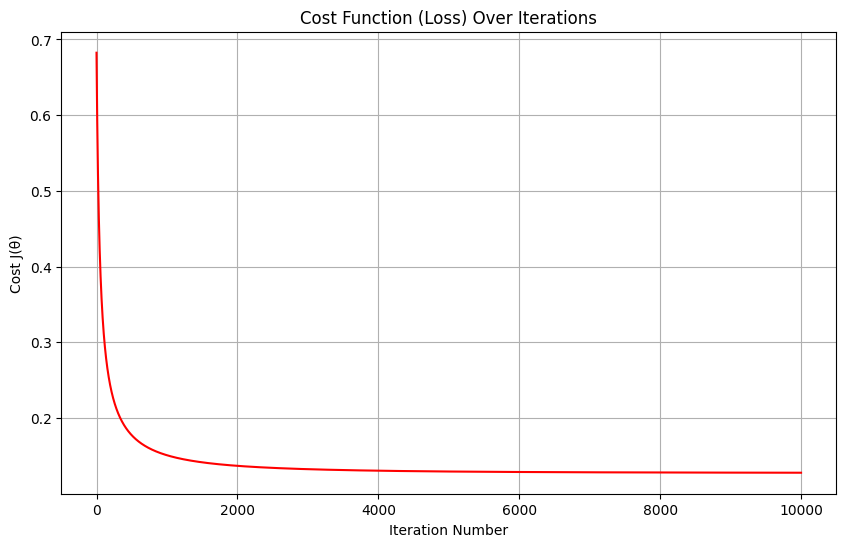

In [26]:
print("\n2) Visualizing the Cost (Loss) dropping")
plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='red')
plt.title('Cost Function (Loss) Over Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Cost J(θ)')
plt.grid(True)
plt.show()

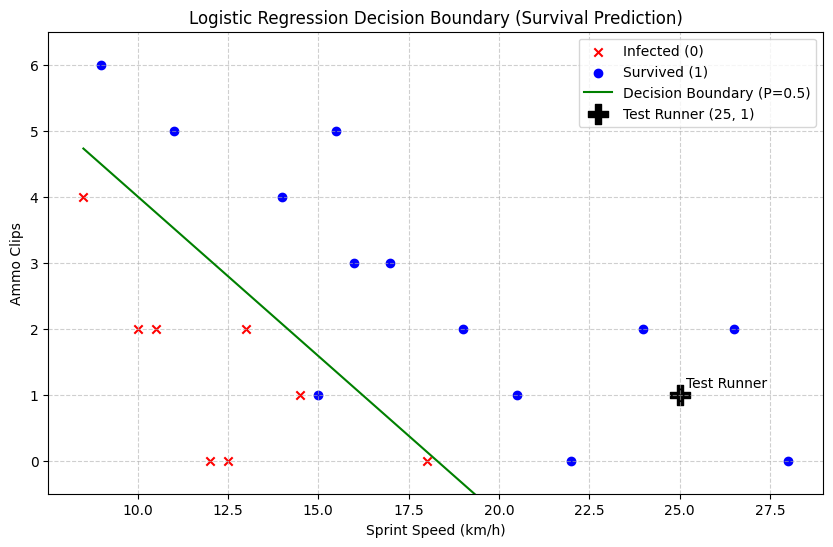

In [27]:
x1_min = X_norm[:, 0].min()
x1_max = X_norm[:, 0].max()
x1_boundary = np.linspace(x1_min, x1_max, 100)
x2_boundary = (-final_theta[0] - final_theta[1] * x1_boundary) / final_theta[2]
x1_original = x1_boundary * sigma[0] + mu[0]
x2_original = x2_boundary * sigma[1] + mu[1]
plt.figure(figsize=(10, 6))
plt.scatter(X_data[Y == 0, 0], X_data[Y == 0, 1], marker='x', color='red', label='Infected (0)')
plt.scatter(X_data[Y == 1, 0], X_data[Y == 1, 1], marker='o', color='blue', label='Survived (1)')
plt.plot(x1_original, x2_original, color='green', linestyle='-', label='Decision Boundary (P=0.5)')
plt.scatter(test_runner[0], test_runner[1], marker='P', color='black', s=200, label='Test Runner (25, 1)')
plt.annotate('Test Runner', (test_runner[0], test_runner[1]), textcoords="offset points", xytext=(5, 5), ha='left')
plt.title('Logistic Regression Decision Boundary (Survival Prediction)')
plt.xlabel('Sprint Speed (km/h)')
plt.ylabel('Ammo Clips')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5) # Set Y limits for better view
plt.show()